In [2]:
#run this before class
library(tidyverse)
library(tidymodels)
library(repr)
theta <- seq(0,2*pi, length.out = 300)
circle <- tibble(X = sin(theta) + 0.75 * runif(300, min = 1, max = 2),
                 Y = cos(theta) + 0.75 * runif(300, min = 1, max = 2))
options(repr.plot.width = 10, repr.plot.height = 10)
circle_plot <- ggplot(circle, aes(x = X, y = Y)) +
    geom_point(alpha = 0.5, size = 2) +
    geom_smooth(method = "lm", se = FALSE) +
    xlim(c(-0.5, 2.5)) +
    ylim(c(-0.5, 2.5))

zigzag <- tibble(X = seq(0,3*pi, length.out = 200),
                Y = cos(X) + runif(200, min = 1, max = 2))
zigzag_plot <- ggplot(zigzag, aes(x = X, y = Y)) +
    geom_point(alpha = 0.5) +
    geom_smooth(method = "lm", se = FALSE)

house_data <- read_csv('data/sacramento.csv') %>%
               select(city, sqft, price, beds, baths)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## DSCI 100 - Introduction to Data Science


### Lecture 9 - Linear Regression

<img src="img/presenting_monster.png" width=500>

*Artist: Allison Horst*

# Housekeeping


Quiz 2 is in person! June 16, 10:30 - 11:30 AM PDT. </li>
    <li>Section 002 Quiz 2 is in HENN 200.</li>
    
  - Topics: version control, classification I & II, and regression I
  
Please see Canvas Anouncemnt for deadline and grade changes

## Group Projects

- Best that everyone works on their own separate files to reduce chances of merge conflicts
- Coordinate putting results into single document towards the end

### Review: Classification

In classification, we want to predict a *categorical* variable

- What political party will someone vote for in the next US election?

- Is a new patient diseased or healthy?

- Is a new email spam or not?

- Will a new, potential customer buy your product?

### Review: Regression

In regression, we want to predict a *quantitative* variable

E.g. predict the price of a 2000 square foot home:

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/07-small-eda-regr-1.png" width="600"/>

### Linear Regression

Last time we used a nearest neighbours approach. Today we will find the line of "best-fit" through the data points:


<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-lin-reg1-1.png" width="600"/>

### Linear Regression

And then we "look up" the value we want to predict of off of the line. 


<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-lin-reg2-1.png" width="600"/>

### Linear Regression

How do we choose the line of "best fit"? We can draw many lines through the data:

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-several-lines-1.png" width="600"/>

### Linear Regression

Just like last time, we will evaluate our model using the error in our predictions. 

We choose the line that minimzes the RMSE (square root of average squared vertical distance between prediction and training data response value).

<img src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-verticalDistToMin-1.png" width="600"/>

*Why did I say "RMSE" and not "RMSPE" above?*

### Linear Regression

The equation for a straight line is: $Y = \beta_0 + \beta_1X$
- $\beta_0$ is the y-intercept of the line (the value where the line cuts the y-axis)
- $\beta_1$ is the slope of the line

Finding the "line of best fit" = finding the values of $\beta_0, \beta_1$ that result in the lowest RMSE!

<img align="left" src="img/straigh-line-equation.png" width="700"/>

### Demo

Let's find the line of best fit (i.e., find $\beta_0, \beta_1$) for the housing data!

In [4]:
library(tidyverse)
library(tidymodels)

### Demo

Let's find the line of best fit (i.e., find $\beta_0, \beta_1$) for the housing data!

In [4]:
head(house_data)

city,sqft,price,beds,baths
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SACRAMENTO,836,59222,2,1
SACRAMENTO,1167,68212,3,1
SACRAMENTO,796,68880,2,1
SACRAMENTO,852,69307,2,1
SACRAMENTO,797,81900,2,1
SACRAMENTO,1122,89921,3,1


### Demo

Let's find the line of best fit (i.e., find $\beta_0, \beta_1$) for the housing data!

In [9]:
# 1. make a recipe

house_recipe <- recipe(price ~ sqft, data = house_data)

# 2. make the linear model specification

house_spec <- linear_reg() %>%
    set_engine("lm") %>%
    set_mode("regression")

# 3. put it together in a workflow and fit

house_fit <- workflow() %>%
    add_recipe(house_recipe) %>%
    add_model(house_spec) %>%
    fit(data = house_data)

house_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)         sqft  
    13859.4        138.5  


1. make a recipe

house_recipe <- recipe(price ~ sqft, data = house_data)

2. make the linear model specification

house_spec <- linear_reg() %>%
                set_engine("lm") %>%
                set_mode("regression")
                   

3. put it together in a workflow and fit

house_fit <- workflow() %>%
                add_recipe(house_recipe) %>%
                add_model(house_spec) %>%
                fit(data = house_data)

house_fit

We can then write: 

$(\text{house price}) = \beta_0 + \beta_1\times(\text{house size})$

And finally, fill in the values for $\beta_0$ and $\beta_1$:

$(\text{house price}) = 13859.40 + 138.50\times(\text{house size})$

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-lm-predict-all-1.png" width="600"/>

### Linear Regression vs Nearest Neighbours

- Advantages of straight line: 
    - **interpretable:** coefficients are slopes, intercepts; K-NN not easy to interpret
    - **computation-efficient:** can fit the model much faster than K-NN
    - **data-efficient:** needs far fewer data to find a reasonable fit

- Major disadvantage of straight line: cannot capture nonlinear patterns 

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-compareRegression-1.png" width="1200"/>

### Multiple Linear Regression

We can do regression with > 1 predictor. But how do we fit a line with many predictors? 



We don't fit a line - we fit a *hyperplane*! e.g. for $m$ predictors:
 $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_m X_m$$ 
- $\beta_0$: intercept
- $\beta_i$: slope for variable $i=1, \dots, m$

<img src="https://miro.medium.com/max/2874/1*d0icRnPHWjHSNXxuoYT5Vg.png" width="800"/>

https://ubc-dsci.github.io/introduction-to-datascience/regression2.html#multivariate-linear-regression



### Why/why not linear/k-nn regression?

Models are not "one-size fits all." 

`geom_smooth()` using formula 'y ~ x'



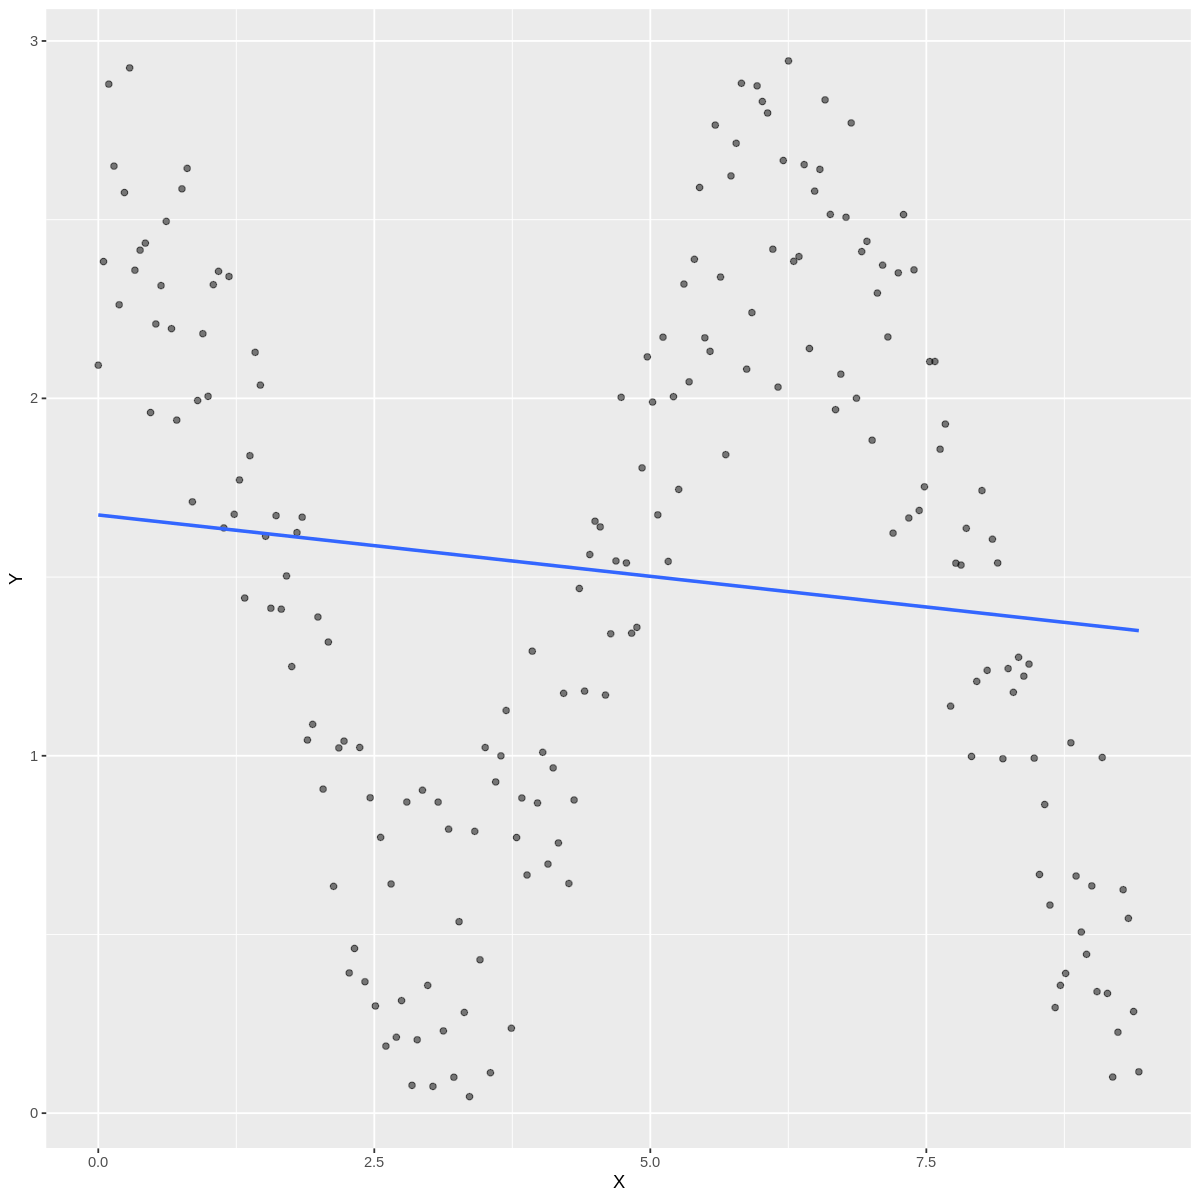

In [3]:
zigzag_plot

### Why/why not linear/k-nn regression?

Models are not "one-size fits all." 

`geom_smooth()` using formula 'y ~ x'



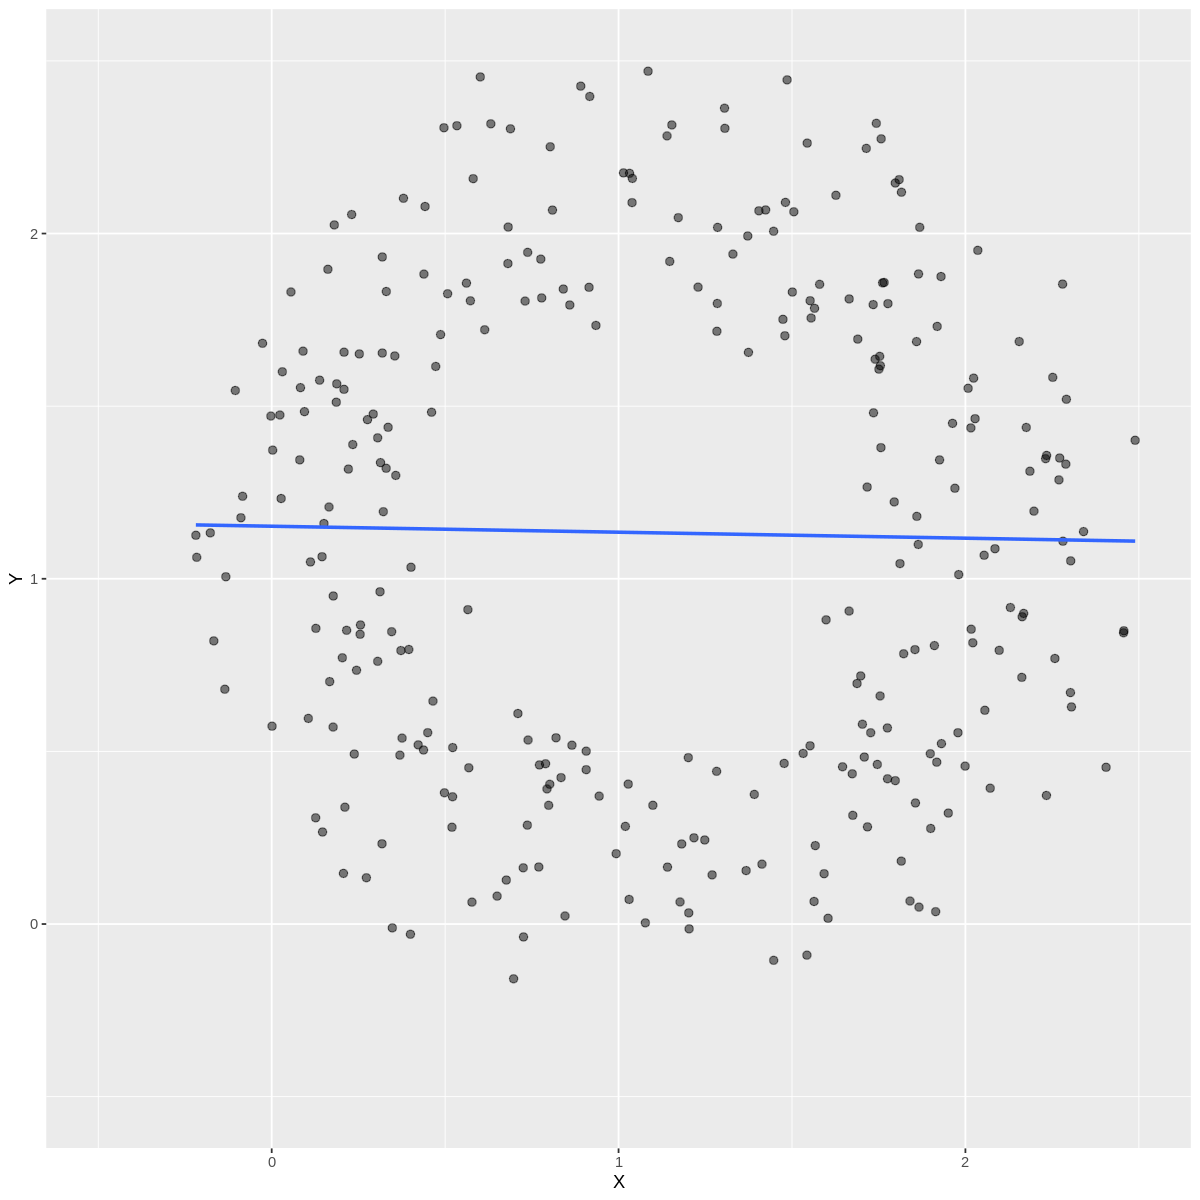

In [4]:
circle_plot

## Worksheet time - go for it!

<img src = "https://media.giphy.com/media/BpGWitbFZflfSUYuZ9/giphy.gif">

## Break time! 
- Take a break! Lecture will resume at 2:30 PM (PT)

### View examples from the textbook:

- https://ubc-dsci.github.io/introduction-to-datascience/regression2.html#multivariate-linear-regression
- https://ubc-dsci.github.io/introduction-to-datascience/regression1.html#multivariate-k-nn-regression


```
## # A tibble: 3 x 5
##   term        estimate std.error statistic  p.value

##   <chr>          <dbl>     <dbl>     <dbl>    <dbl>
## 1 (Intercept)   52690.  13745.        3.83 1.41e- 4
## 2 sqft            155.      6.72     23.0  4.46e-83
## 3 beds         -20209.   5734.       -3.52 4.59e- 4
```
$house\; price = 52690 + 155⋅(house \; size) − 20209 ⋅ (number\; of\; bedrooms)$